In [1]:
import numpy as np
from scipy import special
from matplotlib import pyplot as plt

In [2]:
class Psi_ASDEX_U:
	"""
		Poloidal flux function form McCarthy's ASDEX-U analytical fit
	"""
	def __init__(self, p, q, v, c):
		self.p = p
		self.q = q
		self.v = v
		self.c = c

	def __call__(self,r, z):
		"""
			Grad-Shafranov \psi function
		"""
		return self.c[1] + self.c[2] * r**2 + r * special.jv(1, self.p * r) * (self.c[3] + self.c[4] * z) + self.c[5] * np.cos(self.p * z) + self.c[6] * np.sin(self.p * z) + r ** 2 * (self.c[7] * np.cos(self.p * z) + self.c[8] * np.sin(self.p * z)) + self.c[9] * np.cos(self.p * np.sqrt(r**2 + z**2)) + self.c[10] * np.sin(self.p * np.sqrt(r**2 + z**2)) + r * special.jv(1, self.v * r) * (self.c[11] * np.cos(self.q * z) + self.c[12] * np.sin(self.q * z)) + r * special.jv(1, self.q * r) * (self.c[13] * np.cos(self.v * z) + self.c[14] * np.sin(self.v * z)) + r * special.yv(1, self.v * r) * (self.c[15] * np.cos(self.q * z) + self.c[16] * np.sin(self.q * z)) + r * special.yv(1, self.q * r) * (self.c[17] * np.cos(self.v * z) + self.c[18] * np.sin(self.v * z))


In [3]:
# data for specifi discharge
T = 15.2329
p = np.sqrt(T)
q = p/2
v = p * np.sqrt(3/4)

# first element just to keep base 1 indexing
c = [0, 0.4733, -0.2164, 0.0, 0.0, 0.0, 0.0, -0.06830, 0.01220, 0.1687, \
0.8635, -1.0682, 0.02166, -0.002662, 0.1178, 1.4008, -0.2656, 1.3770, \
0.2468]

psi = Psi_ASDEX_U(p, q, v, c)

In [4]:
r = np.linspace(1, 2.3)
z = np.linspace(-1, 1)
R, Z = np.meshgrid(r, z)

Psi = psi(R, Z)

In [5]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Sans Serif"]})

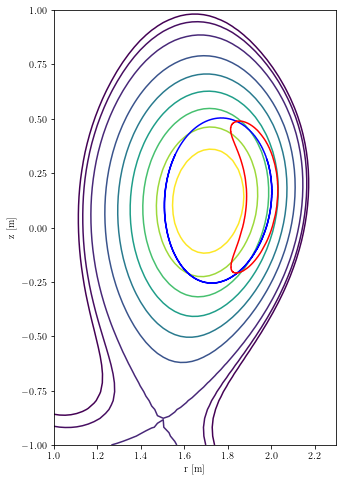

In [39]:
fig, ax = plt.subplots()

ax.contour(R, Z, Psi, [-0.15, -0.1, 0.0025, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2])
ax.set_aspect('equal', adjustable='box')
# ax.axis('off')
ax.set_xlabel('r [m]')
ax.set_ylabel('z [m]')


plt.rcParams['figure.figsize'] = [12, 8]

dir = '/home/maxwell/Physics/2. IB/Maestría/[1] Trabajo de Tesis/code/Minimal/build'

a = 0.5 # scale factor
orbit_data = np.loadtxt(f'{dir}/orbits/gc/pasante.dat')
r = orbit_data[:,0] * a
z = orbit_data[:,2] * a

ax.plot(r, z, 'b')
orbit_data = np.loadtxt(f'{dir}/orbits/gc/part77.dat')
r = orbit_data[:,0] * a
z = orbit_data[:,2] * a

ax.plot(r, z, 'r')


fig.savefig('flux_surfaces.pdf', bbox_inches='tight')
